In [1]:
import warnings
warnings.filterwarnings("ignore")

from config import get_config
from train import train_model, grid_search

import torch
import inference_helpers

import json 

In [2]:
## randomized search
num_models = 8
best_model_params = []
for k in range(1, num_models+1):
    print(f"MODEL CROSS VALIDATING - #{k}")
    print(20*"--")
    config = get_config()
    config["model_folder"] = "cv_weights"
    config["experiment_name"] = "cv_run/tmodel"
    config["run"] = "cv_run"

    param_grid = {
        "hidden_dim": [64, 128, 256, 512, 1024],
    }
    config["tgt_step"] = k-1
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    res, best_params, best_score = grid_search(config, device, lr_cv = 3*10**-3, n_epoch = 50, param_grid = param_grid)
    best_model_params.append(best_params)
    print("Best params:", str(best_params))
    print(20*"--")

MODEL CROSS VALIDATING - #1
----------------------------------------


  0%|          | 0/5 [00:00<?, ?it/s]

hyperparams: hidden_dim: 256, 


 20%|██        | 1/5 [01:54<07:37, 114.35s/it]

Scores: 19694.30, 14627.33, 16876.53, 14526.55; avg score: 16431.18
--------------------
hyperparams: hidden_dim: 512, 


 40%|████      | 2/5 [03:44<05:35, 111.75s/it]

Scores: 19748.07, 14433.76, 16774.29, 13041.61; avg score: 15999.43
--------------------
hyperparams: hidden_dim: 1024, 


 60%|██████    | 3/5 [05:34<03:42, 111.11s/it]

Scores: 19262.74, 14886.21, 16967.93, 12930.98; avg score: 16011.97
--------------------
hyperparams: hidden_dim: 64, 


 80%|████████  | 4/5 [07:23<01:50, 110.31s/it]

Scores: 22734.50, 14358.31, 16552.00, 13339.47; avg score: 16746.07
--------------------
hyperparams: hidden_dim: 128, 


100%|██████████| 5/5 [09:11<00:00, 110.36s/it]

Scores: 21719.17, 14415.74, 16610.99, 17119.55; avg score: 17466.36
--------------------
Best params: {'hidden_dim': 512}
----------------------------------------
MODEL CROSS VALIDATING - #2
----------------------------------------



  0%|          | 0/5 [00:00<?, ?it/s]

hyperparams: hidden_dim: 512, 


 20%|██        | 1/5 [01:49<07:17, 109.26s/it]

Scores: 27583.21, 20983.48, 23826.29, 17481.56; avg score: 22468.64
--------------------
hyperparams: hidden_dim: 128, 


 40%|████      | 2/5 [03:37<05:25, 108.60s/it]

Scores: 27260.37, 20392.12, 23655.31, 22212.17; avg score: 23379.99
--------------------
hyperparams: hidden_dim: 1024, 


 60%|██████    | 3/5 [05:27<03:38, 109.35s/it]

Scores: 27856.18, 20783.39, 23940.71, 16529.14; avg score: 22277.36
--------------------
hyperparams: hidden_dim: 64, 


 80%|████████  | 4/5 [07:16<01:49, 109.09s/it]

Scores: 27833.77, 20462.98, 23196.23, 21412.22; avg score: 23226.30
--------------------
hyperparams: hidden_dim: 256, 


100%|██████████| 5/5 [09:05<00:00, 109.11s/it]

Scores: 28364.39, 20326.47, 23851.06, 19684.33; avg score: 23056.56
--------------------
Best params: {'hidden_dim': 1024}
----------------------------------------
MODEL CROSS VALIDATING - #3
----------------------------------------



  0%|          | 0/5 [00:00<?, ?it/s]

hyperparams: hidden_dim: 256, 


 20%|██        | 1/5 [01:49<07:17, 109.44s/it]

Scores: 31111.88, 23104.28, 25767.25, 20432.57; avg score: 25103.99
--------------------
hyperparams: hidden_dim: 64, 


 40%|████      | 2/5 [03:38<05:27, 109.16s/it]

Scores: 31603.17, 22833.93, 25476.03, 22179.69; avg score: 25523.20
--------------------
hyperparams: hidden_dim: 1024, 


 60%|██████    | 3/5 [05:29<03:39, 109.91s/it]

Scores: 32011.48, 23585.25, 26306.69, 18102.09; avg score: 25001.38
--------------------
hyperparams: hidden_dim: 128, 


 80%|████████  | 4/5 [07:17<01:49, 109.26s/it]

Scores: 31672.14, 23074.56, 25636.06, 22089.12; avg score: 25617.97
--------------------
hyperparams: hidden_dim: 512, 


100%|██████████| 5/5 [09:06<00:00, 109.38s/it]

Scores: 31394.47, 23180.62, 26109.86, 18555.93; avg score: 24810.22
--------------------
Best params: {'hidden_dim': 512}
----------------------------------------
MODEL CROSS VALIDATING - #4
----------------------------------------



  0%|          | 0/5 [00:00<?, ?it/s]

hyperparams: hidden_dim: 64, 


 20%|██        | 1/5 [01:49<07:16, 109.16s/it]

Scores: 34528.75, 24244.95, 26341.19, 19551.47; avg score: 26166.59
--------------------
hyperparams: hidden_dim: 512, 


 40%|████      | 2/5 [03:38<05:28, 109.48s/it]

Scores: 34219.31, 24338.70, 27206.31, 18910.86; avg score: 26168.80
--------------------
hyperparams: hidden_dim: 1024, 


 60%|██████    | 3/5 [05:29<03:39, 109.95s/it]

Scores: 35170.84, 25065.00, 26962.62, 20036.74; avg score: 26808.80
--------------------
hyperparams: hidden_dim: 128, 


 80%|████████  | 4/5 [07:17<01:49, 109.42s/it]

Scores: 34849.41, 24247.33, 26567.20, 19274.52; avg score: 26234.61
--------------------
hyperparams: hidden_dim: 256, 


100%|██████████| 5/5 [09:07<00:00, 109.50s/it]

Scores: 34061.69, 24904.95, 26756.28, 18599.46; avg score: 26080.59
--------------------
Best params: {'hidden_dim': 256}
----------------------------------------
MODEL CROSS VALIDATING - #5
----------------------------------------



  0%|          | 0/5 [00:00<?, ?it/s]

hyperparams: hidden_dim: 1024, 


 20%|██        | 1/5 [01:51<07:24, 111.08s/it]

Scores: 37181.04, 27289.71, 29169.20, 21891.64; avg score: 28882.90
--------------------
hyperparams: hidden_dim: 64, 


 40%|████      | 2/5 [03:40<05:30, 110.02s/it]

Scores: 37154.68, 25959.73, 28192.19, 23636.13; avg score: 28735.68
--------------------
hyperparams: hidden_dim: 512, 


 60%|██████    | 3/5 [05:30<03:39, 109.97s/it]

Scores: 37293.91, 26189.93, 29156.55, 20379.77; avg score: 28255.04
--------------------
hyperparams: hidden_dim: 128, 


 80%|████████  | 4/5 [07:19<01:49, 109.69s/it]

Scores: 36856.94, 25862.59, 28670.97, 24374.00; avg score: 28941.12
--------------------
hyperparams: hidden_dim: 256, 


100%|██████████| 5/5 [09:09<00:00, 109.99s/it]

Scores: 37438.87, 26198.51, 28632.48, 22310.77; avg score: 28645.16
--------------------
Best params: {'hidden_dim': 512}
----------------------------------------
MODEL CROSS VALIDATING - #6
----------------------------------------



  0%|          | 0/5 [00:00<?, ?it/s]

hyperparams: hidden_dim: 256, 


 20%|██        | 1/5 [01:50<07:21, 110.48s/it]

Scores: 37989.04, 26533.17, 29603.74, 21836.65; avg score: 28990.65
--------------------
hyperparams: hidden_dim: 128, 


 40%|████      | 2/5 [03:39<05:29, 109.89s/it]

Scores: 37365.12, 26716.61, 29261.42, 28489.83; avg score: 30458.25
--------------------
hyperparams: hidden_dim: 64, 


 60%|██████    | 3/5 [05:29<03:39, 109.73s/it]

Scores: 37540.16, 26875.61, 29380.34, 24444.12; avg score: 29560.06
--------------------
hyperparams: hidden_dim: 1024, 


 80%|████████  | 4/5 [07:20<01:50, 110.39s/it]

Scores: 39070.16, 27618.64, 30199.28, 24131.11; avg score: 30254.80
--------------------
hyperparams: hidden_dim: 512, 


100%|██████████| 5/5 [09:11<00:00, 110.28s/it]

Scores: 37900.36, 27462.70, 29492.13, 20819.72; avg score: 28918.73
--------------------
Best params: {'hidden_dim': 512}
----------------------------------------
MODEL CROSS VALIDATING - #7
----------------------------------------



  0%|          | 0/5 [00:00<?, ?it/s]

hyperparams: hidden_dim: 512, 


 20%|██        | 1/5 [01:51<07:24, 111.04s/it]

Scores: 38326.31, 26909.08, 30466.93, 22339.60; avg score: 29510.48
--------------------
hyperparams: hidden_dim: 256, 


 40%|████      | 2/5 [03:42<05:33, 111.05s/it]

Scores: 38679.13, 27125.14, 30041.22, 24673.22; avg score: 30129.68
--------------------
hyperparams: hidden_dim: 1024, 


 60%|██████    | 3/5 [05:33<03:42, 111.37s/it]

Scores: 38323.22, 27525.53, 30343.29, 21081.05; avg score: 29318.27
--------------------
hyperparams: hidden_dim: 64, 


 80%|████████  | 4/5 [07:24<01:50, 110.97s/it]

Scores: 37244.02, 27151.00, 29777.56, 24548.88; avg score: 29680.36
--------------------
hyperparams: hidden_dim: 128, 


100%|██████████| 5/5 [09:14<00:00, 110.88s/it]

Scores: 37860.06, 27012.96, 30096.17, 31241.19; avg score: 31552.59
--------------------
Best params: {'hidden_dim': 1024}
----------------------------------------
MODEL CROSS VALIDATING - #8
----------------------------------------



  0%|          | 0/5 [00:00<?, ?it/s]

hyperparams: hidden_dim: 128, 


 20%|██        | 1/5 [01:50<07:23, 110.92s/it]

Scores: 37519.41, 27478.91, 30009.65, 27374.62; avg score: 30595.65
--------------------
hyperparams: hidden_dim: 512, 


 40%|████      | 2/5 [03:42<05:34, 111.50s/it]

Scores: 38284.48, 27734.59, 30780.02, 22662.26; avg score: 29865.34
--------------------
hyperparams: hidden_dim: 64, 


 60%|██████    | 3/5 [05:33<03:42, 111.20s/it]

Scores: 37681.95, 27207.50, 29840.74, 25844.40; avg score: 30143.65
--------------------
hyperparams: hidden_dim: 1024, 


 80%|████████  | 4/5 [07:26<01:51, 111.92s/it]

Scores: 38584.57, 27646.53, 30159.91, 21839.43; avg score: 29557.61
--------------------
hyperparams: hidden_dim: 256, 


100%|██████████| 5/5 [09:18<00:00, 111.70s/it]

Scores: 38235.46, 27646.93, 30188.29, 22307.24; avg score: 29594.48
--------------------
Best params: {'hidden_dim': 1024}
----------------------------------------


In [3]:
## Multiple model training
cfg = get_config()
num_models = 8

for k in range(1, num_models+1):
    print(f"MODEL TRAINING - #{k}")
    print(20*"-")
    cfg = get_config()
    cfg['preload'] = None

    cfg["tgt_step"] = k-1
    cfg['run'] += f"_{k}"
    cfg['model_folder'] += cfg['run']
    cfg['experiment_name'] = f"runs_{cfg['run']}/tmodel"

    cfg['hidden_dim'] = best_model_params[k-1]['hidden_dim']
    model = train_model(cfg)

    # save config to JSON
    with open(f"{cfg['run']}.json", "w") as outfile: 
        json.dump(cfg, outfile)
    print(20*"-")

MODEL TRAINING - #1
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 293.44it/s, step_loss=14091.265]


Training loss of epoch 0: 24190.452632038738


100%|██████████| 14/14 [00:00<00:00, 311.93it/s]


Validation loss of epoch 0: 18907.61328125


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 305.88it/s, step_loss=7325.482] 


Training loss of epoch 1: 17658.29257484899


100%|██████████| 14/14 [00:00<00:00, 350.95it/s]


Validation loss of epoch 1: 16097.2109375


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 296.35it/s, step_loss=16279.270]


Training loss of epoch 2: 16291.499329198283


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 2: 15274.78515625


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 286.01it/s, step_loss=3589.407] 


Training loss of epoch 3: 15654.47086731542


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 3: 14945.275390625


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 287.53it/s, step_loss=7283.885] 


Training loss of epoch 4: 15405.557270866613


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 4: 14569.1298828125


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 292.35it/s, step_loss=15503.266]


Training loss of epoch 5: 15246.346441006888


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 5: 14755.1728515625


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 290.59it/s, step_loss=26806.131]


Training loss of epoch 6: 15043.17522276857


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 6: 14381.73828125


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 287.40it/s, step_loss=11872.839]


Training loss of epoch 7: 14993.019000848642


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 7: 14252.166015625


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 292.84it/s, step_loss=9850.373] 


Training loss of epoch 8: 14932.488844411442


100%|██████████| 14/14 [00:00<00:00, 319.02it/s]


Validation loss of epoch 8: 14258.330078125


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 287.78it/s, step_loss=7747.433] 


Training loss of epoch 9: 14821.189020223892


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 9: 13966.1494140625


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 288.32it/s, step_loss=11680.097]


Training loss of epoch 10: 14774.463697927067


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 10: 13827.7890625


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 291.81it/s, step_loss=11045.145]


Training loss of epoch 11: 14737.463766567242


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 11: 13941.634765625


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 290.45it/s, step_loss=12934.919]


Training loss of epoch 12: 14645.406702401158


100%|██████████| 14/14 [00:00<00:00, 342.37it/s]


Validation loss of epoch 12: 14010.25


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 289.78it/s, step_loss=9413.146] 


Training loss of epoch 13: 14610.181107883636


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 13: 13980.7900390625


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 291.81it/s, step_loss=28812.518]


Training loss of epoch 14: 14625.831083547573


100%|██████████| 14/14 [00:00<00:00, 359.94it/s]


Validation loss of epoch 14: 13842.15625


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 292.21it/s, step_loss=9465.062] 


Training loss of epoch 15: 14557.52313719923


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 15: 13928.3623046875


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 289.65it/s, step_loss=18842.326]


Training loss of epoch 16: 14501.56672683082


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 16: 13713.5078125


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 292.35it/s, step_loss=8247.325] 


Training loss of epoch 17: 14466.990228134984


100%|██████████| 14/14 [00:00<00:00, 359.93it/s]


Validation loss of epoch 17: 13787.4384765625


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 290.86it/s, step_loss=5157.801] 


Training loss of epoch 18: 14424.397487457569


100%|██████████| 14/14 [00:00<00:00, 342.37it/s]


Validation loss of epoch 18: 14044.421875


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 290.46it/s, step_loss=29843.125]


Training loss of epoch 19: 14410.952975239617


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 19: 13601.8837890625


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 287.30it/s, step_loss=1848.369] 


Training loss of epoch 20: 14435.858940928889


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 20: 13972.896484375


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 288.98it/s, step_loss=13961.905]


Training loss of epoch 21: 14347.592522276856


100%|██████████| 14/14 [00:00<00:00, 304.98it/s]


Validation loss of epoch 21: 13833.1513671875


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 288.32it/s, step_loss=6176.834] 


Training loss of epoch 22: 14314.053834177816


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 22: 13560.7509765625


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 290.19it/s, step_loss=4106.366] 


Training loss of epoch 23: 14317.39262102511


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 23: 13838.32421875


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 293.17it/s, step_loss=4526.190] 


Training loss of epoch 24: 14229.20145267572


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 24: 13823.81640625


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 289.52it/s, step_loss=10414.939]


Training loss of epoch 25: 14230.122190432807


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 25: 13608.66015625


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 290.86it/s, step_loss=7556.927] 


Training loss of epoch 26: 14211.719020660694


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 26: 13687.3505859375


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 289.78it/s, step_loss=5990.111] 


Training loss of epoch 27: 14158.600284076727


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 27: 13828.1640625


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 292.21it/s, step_loss=8844.096] 


Training loss of epoch 28: 14160.227508642422


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 28: 13650.8134765625


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 290.78it/s, step_loss=24449.795]


Training loss of epoch 29: 14202.447296045078


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 29: 13556.5478515625


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 294.68it/s, step_loss=18488.445]


Training loss of epoch 30: 14123.642056303665


100%|██████████| 14/14 [00:00<00:00, 350.94it/s]


Validation loss of epoch 30: 13697.099609375


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 291.12it/s, step_loss=5054.569] 


Training loss of epoch 31: 13998.217924757888


100%|██████████| 14/14 [00:00<00:00, 326.44it/s]


Validation loss of epoch 31: 13557.58984375


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 290.99it/s, step_loss=4042.077] 


Training loss of epoch 32: 14064.483158586885


100%|██████████| 14/14 [00:00<00:00, 342.14it/s]


Validation loss of epoch 32: 13828.8330078125


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 286.73it/s, step_loss=6719.400] 


Training loss of epoch 33: 14010.308732590356


100%|██████████| 14/14 [00:00<00:00, 311.96it/s]


Validation loss of epoch 33: 13680.7490234375


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 281.65it/s, step_loss=20271.059]


Training loss of epoch 34: 14011.181201483876


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 34: 13619.060546875


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 290.86it/s, step_loss=19512.420]


Training loss of epoch 35: 14027.762327151557


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 35: 13642.6396484375


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 290.25it/s, step_loss=10810.235]


Training loss of epoch 36: 13947.076025234624


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 36: 13538.5478515625


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 290.31it/s, step_loss=19228.055]


Training loss of epoch 37: 13990.510040185703


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 37: 13642.9814453125


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 286.74it/s, step_loss=15730.357]


Training loss of epoch 38: 13861.499307358226


100%|██████████| 14/14 [00:00<00:00, 264.87it/s]


Validation loss of epoch 38: 13511.08984375


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 290.46it/s, step_loss=11215.562]


Training loss of epoch 39: 13863.14072250025


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 39: 13587.1923828125


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 293.16it/s, step_loss=15850.257]


Training loss of epoch 40: 13929.624028117512


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 40: 13609.1435546875


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 290.59it/s, step_loss=3033.978] 


Training loss of epoch 41: 13857.219808072708


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 41: 13667.1142578125


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 290.59it/s, step_loss=29775.277]


Training loss of epoch 42: 13910.61984028679


100%|██████████| 14/14 [00:00<00:00, 342.13it/s]


Validation loss of epoch 42: 13600.6767578125


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 290.05it/s, step_loss=6033.400] 


Training loss of epoch 43: 13800.77839051268


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 43: 13525.333984375


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 290.05it/s, step_loss=4584.457] 


Training loss of epoch 44: 13761.974995475988


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 44: 13488.453125


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 288.45it/s, step_loss=5982.976] 


Training loss of epoch 45: 13757.328611721246


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 45: 13452.90234375


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 290.19it/s, step_loss=12707.696]


Training loss of epoch 46: 13709.091180673422


100%|██████████| 14/14 [00:00<00:00, 359.94it/s]


Validation loss of epoch 46: 13536.849609375


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 290.32it/s, step_loss=19933.277]


Training loss of epoch 47: 13718.769274629343


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 47: 13593.0908203125


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 289.38it/s, step_loss=13187.958]


Training loss of epoch 48: 13673.379759572184


100%|██████████| 14/14 [00:00<00:00, 350.95it/s]


Validation loss of epoch 48: 13399.3310546875


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 292.08it/s, step_loss=8817.966] 


Training loss of epoch 49: 13739.497897894618


100%|██████████| 14/14 [00:00<00:00, 350.95it/s]


Validation loss of epoch 49: 13433.70703125
--------------------
MODEL TRAINING - #2
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 285.57it/s, step_loss=16453.604]


Training loss of epoch 0: 25427.50031980082


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 0: 21548.099609375


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 300.47it/s, step_loss=22935.219]


Training loss of epoch 1: 21697.83424567567


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 1: 20280.505859375


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 293.03it/s, step_loss=27513.881]


Training loss of epoch 2: 21129.41655070637


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 2: 20438.27734375


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 290.72it/s, step_loss=15314.195]


Training loss of epoch 3: 20806.34803845098


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 3: 20000.564453125


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 292.49it/s, step_loss=12261.883]


Training loss of epoch 4: 20632.430745182708


100%|██████████| 14/14 [00:00<00:00, 242.03it/s]


Validation loss of epoch 4: 19901.16015625


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 294.12it/s, step_loss=4204.486] 


Training loss of epoch 5: 20361.58555841903


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 5: 20179.13671875


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 290.99it/s, step_loss=9580.228] 


Training loss of epoch 6: 20325.984958441495


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 6: 20594.888671875


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 294.67it/s, step_loss=20297.430]


Training loss of epoch 7: 20228.135993348144


100%|██████████| 14/14 [00:00<00:00, 286.32it/s]


Validation loss of epoch 7: 20122.443359375


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 294.12it/s, step_loss=20650.211]


Training loss of epoch 8: 20128.478379904653


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 8: 19525.720703125


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 295.10it/s, step_loss=15296.387]


Training loss of epoch 9: 20099.093032398163


100%|██████████| 14/14 [00:00<00:00, 242.02it/s]


Validation loss of epoch 9: 19901.412109375


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 293.44it/s, step_loss=19164.072]


Training loss of epoch 10: 19939.52912059455


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 10: 19510.216796875


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 295.93it/s, step_loss=12069.594]


Training loss of epoch 11: 19833.402928751497


100%|██████████| 14/14 [00:00<00:00, 311.76it/s]


Validation loss of epoch 11: 20507.6875


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 291.94it/s, step_loss=19662.160]


Training loss of epoch 12: 19814.396106074033


100%|██████████| 14/14 [00:00<00:00, 319.02it/s]


Validation loss of epoch 12: 19513.98828125


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 291.94it/s, step_loss=37569.332]


Training loss of epoch 13: 19736.09287483776


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 13: 19418.634765625


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 292.76it/s, step_loss=19194.143]


Training loss of epoch 14: 19615.213982627796


100%|██████████| 14/14 [00:00<00:00, 233.95it/s]


Validation loss of epoch 14: 19709.517578125


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 292.40it/s, step_loss=18728.885]


Training loss of epoch 15: 19617.19210201178


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 15: 19900.0078125


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 291.81it/s, step_loss=49528.438]


Training loss of epoch 16: 19527.565573207867


100%|██████████| 14/14 [00:00<00:00, 250.68it/s]


Validation loss of epoch 16: 19396.294921875


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 290.19it/s, step_loss=11983.439]


Training loss of epoch 17: 19530.788076577475


100%|██████████| 14/14 [00:00<00:00, 280.74it/s]


Validation loss of epoch 17: 19516.076171875


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 292.81it/s, step_loss=19943.441]


Training loss of epoch 18: 19428.172419441395


100%|██████████| 14/14 [00:00<00:00, 259.94it/s]


Validation loss of epoch 18: 19356.578125


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 298.32it/s, step_loss=14735.936]


Training loss of epoch 19: 19381.53416720747


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 19: 19577.693359375


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 295.79it/s, step_loss=14324.424]


Training loss of epoch 20: 19320.822677466054


100%|██████████| 14/14 [00:00<00:00, 311.73it/s]


Validation loss of epoch 20: 19857.56640625


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 292.21it/s, step_loss=5930.798] 


Training loss of epoch 21: 19206.755695574582


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 21: 20534.77734375


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 293.29it/s, step_loss=17789.014]


Training loss of epoch 22: 19278.911098492412


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 22: 19838.724609375


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 296.63it/s, step_loss=9521.767] 


Training loss of epoch 23: 19143.10852011781


100%|██████████| 14/14 [00:00<00:00, 305.15it/s]


Validation loss of epoch 23: 19516.36328125


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 296.07it/s, step_loss=26241.191]


Training loss of epoch 24: 19147.344771802615


100%|██████████| 14/14 [00:00<00:00, 298.50it/s]


Validation loss of epoch 24: 20431.693359375


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 293.85it/s, step_loss=6510.716] 


Training loss of epoch 25: 19086.58131988818


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 25: 19421.626953125


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 292.62it/s, step_loss=10605.811]


Training loss of epoch 26: 18911.76218051118


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 26: 19325.298828125


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 293.29it/s, step_loss=18856.965]


Training loss of epoch 27: 19034.06916433706


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 27: 19515.9140625


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 289.79it/s, step_loss=7507.642] 


Training loss of epoch 28: 18863.02864947334


100%|██████████| 14/14 [00:00<00:00, 275.10it/s]


Validation loss of epoch 28: 19647.5


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 297.74it/s, step_loss=10097.775]


Training loss of epoch 29: 18933.975857378195


100%|██████████| 14/14 [00:00<00:00, 292.27it/s]


Validation loss of epoch 29: 20343.7109375


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 290.99it/s, step_loss=16951.715]


Training loss of epoch 30: 18887.479475027456


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 30: 20273.333984375


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 293.03it/s, step_loss=28340.301]


Training loss of epoch 31: 18776.98845285044


100%|██████████| 14/14 [00:00<00:00, 326.47it/s]


Validation loss of epoch 31: 20037.501953125


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 292.76it/s, step_loss=4139.993] 


Training loss of epoch 32: 18799.910497890876


100%|██████████| 14/14 [00:00<00:00, 308.05it/s]


Validation loss of epoch 32: 19175.421875


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 295.85it/s, step_loss=15659.090]


Training loss of epoch 33: 18709.424974727935


100%|██████████| 14/14 [00:00<00:00, 326.19it/s]


Validation loss of epoch 33: 19265.6875


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 284.39it/s, step_loss=6334.995] 


Training loss of epoch 34: 18705.563512442593


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 34: 19205.30078125


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 278.22it/s, step_loss=10889.080]


Training loss of epoch 35: 18678.83615668056


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 35: 19622.400390625


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 284.85it/s, step_loss=24509.508]


Training loss of epoch 36: 18564.26134434904


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 36: 19589.6875


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 283.76it/s, step_loss=9929.125] 


Training loss of epoch 37: 18554.6626179363


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 37: 19550.353515625


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 287.26it/s, step_loss=37102.711]


Training loss of epoch 38: 18555.93446423223


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 38: 19486.794921875


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 291.98it/s, step_loss=24482.588]


Training loss of epoch 39: 18526.708528853833


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 39: 19489.013671875


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 293.58it/s, step_loss=13948.782]


Training loss of epoch 40: 18477.1149598143


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 40: 19790.5546875


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 292.00it/s, step_loss=23452.346]


Training loss of epoch 41: 18375.67512136831


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 41: 19441.861328125


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 296.07it/s, step_loss=14073.090]


Training loss of epoch 42: 18323.93435191194


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 42: 19111.841796875


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 294.54it/s, step_loss=8169.979] 


Training loss of epoch 43: 18315.44756670577


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 43: 20338.955078125


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 296.14it/s, step_loss=7241.361] 


Training loss of epoch 44: 18320.70322250025


100%|██████████| 14/14 [00:00<00:00, 318.83it/s]


Validation loss of epoch 44: 19382.494140625


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 292.49it/s, step_loss=18621.801]


Training loss of epoch 45: 18295.182584427417


100%|██████████| 14/14 [00:00<00:00, 286.49it/s]


Validation loss of epoch 45: 19179.447265625


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 295.09it/s, step_loss=17451.270]


Training loss of epoch 46: 18200.159370007987


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 46: 19242.48828125


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 294.54it/s, step_loss=12206.559]


Training loss of epoch 47: 18182.63612126847


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 47: 20076.91796875


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 293.58it/s, step_loss=21611.539]


Training loss of epoch 48: 18121.983404677518


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 48: 19757.6640625


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 293.03it/s, step_loss=13920.923]


Training loss of epoch 49: 18097.891182701427


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 49: 20024.759765625
--------------------
MODEL TRAINING - #3
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 287.26it/s, step_loss=40985.488]


Training loss of epoch 0: 27516.136459789337


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 0: 24537.994140625


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 302.35it/s, step_loss=12262.976]


Training loss of epoch 1: 23996.75254280651


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 1: 23292.83984375


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 298.32it/s, step_loss=15011.029]


Training loss of epoch 2: 23359.15781624401


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 2: 22710.3828125


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 297.90it/s, step_loss=21575.014]


Training loss of epoch 3: 23118.9787496256


100%|██████████| 14/14 [00:00<00:00, 269.82it/s]


Validation loss of epoch 3: 22817.333984375


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 298.60it/s, step_loss=21486.623]


Training loss of epoch 4: 22900.244833266774


100%|██████████| 14/14 [00:00<00:00, 342.37it/s]


Validation loss of epoch 4: 22438.96875


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 299.89it/s, step_loss=17445.945]


Training loss of epoch 5: 22775.656196959862


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 5: 22852.513671875


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 299.30it/s, step_loss=10611.906]


Training loss of epoch 6: 22624.010119745908


100%|██████████| 14/14 [00:00<00:00, 298.48it/s]


Validation loss of epoch 6: 22702.412109375


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 293.99it/s, step_loss=17908.762]


Training loss of epoch 7: 22613.46183918231


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]


Validation loss of epoch 7: 22142.185546875


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 296.63it/s, step_loss=26360.211]


Training loss of epoch 8: 22503.48882413139


100%|██████████| 14/14 [00:00<00:00, 292.18it/s]


Validation loss of epoch 8: 22365.412109375


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 289.91it/s, step_loss=20731.260]


Training loss of epoch 9: 22273.901899148863


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 9: 22730.912109375


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 290.04it/s, step_loss=16816.793]


Training loss of epoch 10: 22310.057631227537


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 10: 22155.65234375


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 296.07it/s, step_loss=55138.816]


Training loss of epoch 11: 22250.034817729134


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 11: 22780.755859375


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 300.75it/s, step_loss=7927.135] 


Training loss of epoch 12: 22158.601684960315


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 12: 22174.890625


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 288.85it/s, step_loss=6605.964] 


Training loss of epoch 13: 22085.76615306135


100%|██████████| 14/14 [00:00<00:00, 292.28it/s]


Validation loss of epoch 13: 22674.154296875


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 291.40it/s, step_loss=8445.288] 


Training loss of epoch 14: 22023.59690276807


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 14: 22348.984375


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 289.09it/s, step_loss=73108.875]


Training loss of epoch 15: 21996.968530039438


100%|██████████| 14/14 [00:00<00:00, 318.81it/s]


Validation loss of epoch 15: 22990.78125


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 294.40it/s, step_loss=2836.812] 


Training loss of epoch 16: 21871.78057802828


100%|██████████| 14/14 [00:00<00:00, 286.32it/s]


Validation loss of epoch 16: 23288.65234375


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 289.38it/s, step_loss=22960.504]


Training loss of epoch 17: 21829.324568190896


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 17: 22350.498046875


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 289.64it/s, step_loss=6948.255] 


Training loss of epoch 18: 21828.033828686603


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 18: 22626.693359375


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 289.65it/s, step_loss=35684.809]


Training loss of epoch 19: 21730.251336923422


100%|██████████| 14/14 [00:00<00:00, 292.34it/s]


Validation loss of epoch 19: 22969.5625


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 290.18it/s, step_loss=6166.312] 


Training loss of epoch 20: 21614.622181072784


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 20: 22367.966796875


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 285.30it/s, step_loss=45844.984]


Training loss of epoch 21: 21617.448111147165


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 21: 22698.224609375


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 290.32it/s, step_loss=18897.348]


Training loss of epoch 22: 21588.705663126497


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 22: 23423.732421875


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 288.32it/s, step_loss=21550.982]


Training loss of epoch 23: 21493.569243897266


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 23: 23032.7421875


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 290.58it/s, step_loss=33717.461]


Training loss of epoch 24: 21484.406303040138


100%|██████████| 14/14 [00:00<00:00, 242.03it/s]


Validation loss of epoch 24: 22452.57421875


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 290.46it/s, step_loss=10972.262]


Training loss of epoch 25: 21352.230498390076


100%|██████████| 14/14 [00:00<00:00, 326.23it/s]


Validation loss of epoch 25: 22507.2734375


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 287.05it/s, step_loss=60894.301]


Training loss of epoch 26: 21506.203128120007


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 26: 22644.814453125


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 289.25it/s, step_loss=15859.151]


Training loss of epoch 27: 21263.831518008687


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 27: 22781.224609375


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 287.13it/s, step_loss=15412.628]


Training loss of epoch 28: 21333.88932083666


100%|██████████| 14/14 [00:00<00:00, 311.93it/s]


Validation loss of epoch 28: 23529.318359375


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 288.84it/s, step_loss=13633.301]


Training loss of epoch 29: 21166.03567105132


100%|██████████| 14/14 [00:00<00:00, 350.65it/s]


Validation loss of epoch 29: 22877.234375


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 289.65it/s, step_loss=32398.266]


Training loss of epoch 30: 21230.355950791232


100%|██████████| 14/14 [00:00<00:00, 292.28it/s]


Validation loss of epoch 30: 22725.73046875


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 288.85it/s, step_loss=43062.449]


Training loss of epoch 31: 21131.02257013778


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 31: 22835.087890625


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 287.88it/s, step_loss=12495.193]


Training loss of epoch 32: 21056.65901120707


100%|██████████| 14/14 [00:00<00:00, 342.39it/s]


Validation loss of epoch 32: 22632.408203125


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 287.98it/s, step_loss=5535.644] 


Training loss of epoch 33: 20953.33677288214


100%|██████████| 14/14 [00:00<00:00, 334.24it/s]


Validation loss of epoch 33: 22247.935546875


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 288.64it/s, step_loss=23895.697]


Training loss of epoch 34: 21049.309375312


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 34: 23178.208984375


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 288.58it/s, step_loss=6610.894] 


Training loss of epoch 35: 20939.336743242064


100%|██████████| 14/14 [00:00<00:00, 334.00it/s]


Validation loss of epoch 35: 22877.708984375


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 289.25it/s, step_loss=4433.955] 


Training loss of epoch 36: 20945.620529028554


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 36: 22471.90234375


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 288.73it/s, step_loss=14248.712]


Training loss of epoch 37: 20937.49664443141


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 37: 22622.8984375


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 286.61it/s, step_loss=3487.374] 


Training loss of epoch 38: 20982.333807314546


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 38: 22719.236328125


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 287.12it/s, step_loss=17005.709]


Training loss of epoch 39: 20820.568917856428


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 39: 23311.0390625


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 290.32it/s, step_loss=16120.373]


Training loss of epoch 40: 20821.703797361723


100%|██████████| 14/14 [00:00<00:00, 326.22it/s]


Validation loss of epoch 40: 22670.865234375


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 289.12it/s, step_loss=17971.086]


Training loss of epoch 41: 20709.749967239917


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 41: 22595.48046875


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 290.39it/s, step_loss=15582.732]


Training loss of epoch 42: 20734.125021840056


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 42: 22910.912109375


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 290.05it/s, step_loss=44863.488]


Training loss of epoch 43: 20749.922274361023


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 43: 22455.171875


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 293.31it/s, step_loss=25267.041]


Training loss of epoch 44: 20652.312891561003


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 44: 22463.646484375


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 288.18it/s, step_loss=4060.844] 


Training loss of epoch 45: 20638.95516743523


100%|██████████| 14/14 [00:00<00:00, 311.96it/s]


Validation loss of epoch 45: 22659.71875


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 287.65it/s, step_loss=20459.975]


Training loss of epoch 46: 20653.18369983027


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 46: 22806.1640625


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 295.23it/s, step_loss=21013.350]


Training loss of epoch 47: 20442.184024311104


100%|██████████| 14/14 [00:00<00:00, 246.28it/s]


Validation loss of epoch 47: 22905.376953125


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 287.30it/s, step_loss=16510.125]


Training loss of epoch 48: 20500.558175668928


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 48: 22506.82421875


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 286.21it/s, step_loss=9533.119] 


Training loss of epoch 49: 20502.051782772563


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 49: 22601.951171875
--------------------
MODEL TRAINING - #4
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 294.41it/s, step_loss=6569.757] 


Training loss of epoch 0: 28789.36741058057


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 0: 26032.65625


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 301.32it/s, step_loss=40665.840]


Training loss of epoch 1: 25660.415564783845


100%|██████████| 14/14 [00:00<00:00, 250.66it/s]


Validation loss of epoch 1: 24662.166015625


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 295.79it/s, step_loss=10962.752]


Training loss of epoch 2: 24789.437543680113


100%|██████████| 14/14 [00:00<00:00, 326.46it/s]


Validation loss of epoch 2: 24323.2265625


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 296.21it/s, step_loss=7241.228] 


Training loss of epoch 3: 24378.519314409445


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 3: 24036.03125


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 297.47it/s, step_loss=12462.879]


Training loss of epoch 4: 24088.784033047126


100%|██████████| 14/14 [00:00<00:00, 250.68it/s]


Validation loss of epoch 4: 24185.3984375


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 296.35it/s, step_loss=20600.748]


Training loss of epoch 5: 23894.853787065695


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 5: 23913.279296875


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 297.33it/s, step_loss=25409.693]


Training loss of epoch 6: 23804.830282485524


100%|██████████| 14/14 [00:00<00:00, 326.44it/s]


Validation loss of epoch 6: 23682.154296875


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 295.43it/s, step_loss=9435.863] 


Training loss of epoch 7: 23651.188111521566


100%|██████████| 14/14 [00:00<00:00, 326.24it/s]


Validation loss of epoch 7: 24287.80078125


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 298.09it/s, step_loss=102720.734]


Training loss of epoch 8: 23663.90162926817


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 8: 23917.48046875


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 297.19it/s, step_loss=30342.156]


Training loss of epoch 9: 23536.70437144319


100%|██████████| 14/14 [00:00<00:00, 305.13it/s]


Validation loss of epoch 9: 23478.53515625


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 293.86it/s, step_loss=7172.447] 


Training loss of epoch 10: 23383.631229095947


100%|██████████| 14/14 [00:00<00:00, 369.13it/s]


Validation loss of epoch 10: 24035.458984375


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 296.77it/s, step_loss=32875.559]


Training loss of epoch 11: 23453.423041882987


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 11: 23514.5546875


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 296.21it/s, step_loss=15618.972]


Training loss of epoch 12: 23264.368596183605


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 12: 23523.974609375


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 297.31it/s, step_loss=34505.906]


Training loss of epoch 13: 23252.363376410245


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 13: 23673.455078125


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 297.48it/s, step_loss=5187.463] 


Training loss of epoch 14: 23125.938040541383


100%|██████████| 14/14 [00:00<00:00, 350.92it/s]


Validation loss of epoch 14: 23881.87890625


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 287.79it/s, step_loss=13777.651]


Training loss of epoch 15: 23044.48630784495


100%|██████████| 14/14 [00:00<00:00, 305.15it/s]


Validation loss of epoch 15: 23702.498046875


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 296.49it/s, step_loss=29630.637]


Training loss of epoch 16: 22996.129846932407


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 16: 23385.150390625


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 294.96it/s, step_loss=14376.262]


Training loss of epoch 17: 23004.646665335462


100%|██████████| 14/14 [00:00<00:00, 359.67it/s]


Validation loss of epoch 17: 24096.853515625


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 296.48it/s, step_loss=10304.248]


Training loss of epoch 18: 22923.218097918332


100%|██████████| 14/14 [00:00<00:00, 342.38it/s]


Validation loss of epoch 18: 23653.4453125


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 297.18it/s, step_loss=19637.275]


Training loss of epoch 19: 22807.02444214257


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 19: 23712.818359375


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 289.77it/s, step_loss=13218.611]


Training loss of epoch 20: 22834.828767721647


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 20: 23748.79296875


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 294.41it/s, step_loss=10058.037]


Training loss of epoch 21: 22742.36187100639


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 21: 23387.876953125


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 296.19it/s, step_loss=42714.801]


Training loss of epoch 22: 22773.93864816294


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 22: 23606.5625


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 293.03it/s, step_loss=31889.973]


Training loss of epoch 23: 22737.653853833865


100%|██████████| 14/14 [00:00<00:00, 326.47it/s]


Validation loss of epoch 23: 23504.96484375


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 297.89it/s, step_loss=37167.027]


Training loss of epoch 24: 22670.373733276756


100%|██████████| 14/14 [00:00<00:00, 326.25it/s]


Validation loss of epoch 24: 23634.88671875


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 292.90it/s, step_loss=56593.164]


Training loss of epoch 25: 22626.25048828125


100%|██████████| 14/14 [00:00<00:00, 259.81it/s]


Validation loss of epoch 25: 23578.44921875


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 293.16it/s, step_loss=25457.248]


Training loss of epoch 26: 22531.20393464207


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 26: 23671.015625


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 292.21it/s, step_loss=17038.514]


Training loss of epoch 27: 22576.238849091453


100%|██████████| 14/14 [00:00<00:00, 350.94it/s]


Validation loss of epoch 27: 23951.125


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 296.21it/s, step_loss=12263.186]


Training loss of epoch 28: 22459.34813205122


100%|██████████| 14/14 [00:00<00:00, 359.67it/s]


Validation loss of epoch 28: 23839.0546875


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 298.18it/s, step_loss=17144.076]


Training loss of epoch 29: 22442.28834645817


100%|██████████| 14/14 [00:00<00:00, 298.48it/s]


Validation loss of epoch 29: 23979.546875


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 293.57it/s, step_loss=22416.980]


Training loss of epoch 30: 22398.026598068092


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 30: 24298.5234375


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 297.33it/s, step_loss=20174.371]


Training loss of epoch 31: 22341.860173722045


100%|██████████| 14/14 [00:00<00:00, 246.27it/s]


Validation loss of epoch 31: 23636.607421875


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 297.89it/s, step_loss=18068.484]


Training loss of epoch 32: 22420.726258299223


100%|██████████| 14/14 [00:00<00:00, 359.95it/s]


Validation loss of epoch 32: 23986.763671875


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 296.77it/s, step_loss=21547.234]


Training loss of epoch 33: 22316.552512854432


100%|██████████| 14/14 [00:00<00:00, 359.94it/s]


Validation loss of epoch 33: 23664.849609375


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 295.65it/s, step_loss=23066.918]


Training loss of epoch 34: 22228.926743772463


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 34: 23504.96484375


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 296.35it/s, step_loss=24472.785]


Training loss of epoch 35: 22189.79991700779


100%|██████████| 14/14 [00:00<00:00, 292.28it/s]


Validation loss of epoch 35: 23904.546875


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 294.96it/s, step_loss=2000.793] 


Training loss of epoch 36: 22175.515005483416


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 36: 23910.140625


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 295.17it/s, step_loss=5478.170] 


Training loss of epoch 37: 22162.155142397165


100%|██████████| 14/14 [00:00<00:00, 292.29it/s]


Validation loss of epoch 37: 24120.404296875


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 296.07it/s, step_loss=19311.736]


Training loss of epoch 38: 22070.228893145966


100%|██████████| 14/14 [00:00<00:00, 326.47it/s]


Validation loss of epoch 38: 23575.681640625


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 295.93it/s, step_loss=47220.930]


Training loss of epoch 39: 22163.130751734723


100%|██████████| 14/14 [00:00<00:00, 359.91it/s]


Validation loss of epoch 39: 23901.82421875


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 297.19it/s, step_loss=6038.999] 


Training loss of epoch 40: 22085.858629318092


100%|██████████| 14/14 [00:00<00:00, 326.47it/s]


Validation loss of epoch 40: 23908.482421875


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 296.63it/s, step_loss=21906.852]


Training loss of epoch 41: 21982.89568409295


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 41: 23932.9765625


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 295.23it/s, step_loss=36087.305]


Training loss of epoch 42: 22048.86707829972


100%|██████████| 14/14 [00:00<00:00, 342.37it/s]


Validation loss of epoch 42: 23756.931640625


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 290.44it/s, step_loss=41249.156]


Training loss of epoch 43: 22012.2737120607


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 43: 23719.55859375


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 294.27it/s, step_loss=8049.416] 


Training loss of epoch 44: 21980.387396571736


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]


Validation loss of epoch 44: 23512.234375


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 295.37it/s, step_loss=5206.538] 


Training loss of epoch 45: 21910.23291015625


100%|██████████| 14/14 [00:00<00:00, 334.23it/s]


Validation loss of epoch 45: 23774.384765625


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 294.95it/s, step_loss=14208.718]


Training loss of epoch 46: 21829.937946161142


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]


Validation loss of epoch 46: 23786.1640625


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 292.47it/s, step_loss=22723.570]


Training loss of epoch 47: 21884.125405601037


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 47: 23550.83203125


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 293.71it/s, step_loss=20082.125]


Training loss of epoch 48: 21837.150797786042


100%|██████████| 14/14 [00:00<00:00, 359.93it/s]


Validation loss of epoch 48: 23801.220703125


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 294.26it/s, step_loss=6730.233] 


Training loss of epoch 49: 21890.3721483127


100%|██████████| 14/14 [00:00<00:00, 350.96it/s]


Validation loss of epoch 49: 23611.431640625
--------------------
MODEL TRAINING - #5
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 290.99it/s, step_loss=15261.179]


Training loss of epoch 0: 28926.115604095947


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 0: 26758.89453125


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 297.19it/s, step_loss=19126.404]


Training loss of epoch 1: 26595.49602666983


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 1: 26407.28125


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 296.91it/s, step_loss=15328.189]


Training loss of epoch 2: 25987.413393258288


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 2: 26437.396484375


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 298.46it/s, step_loss=2531.661] 


Training loss of epoch 3: 25595.171973670254


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 3: 25818.90234375


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 288.59it/s, step_loss=39179.684]


Training loss of epoch 4: 25412.124762879394


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 4: 26037.783203125


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 285.82it/s, step_loss=8567.284] 


Training loss of epoch 5: 25163.182922948283


100%|██████████| 14/14 [00:00<00:00, 326.22it/s]


Validation loss of epoch 5: 25504.26953125


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 291.26it/s, step_loss=11800.545]


Training loss of epoch 6: 25068.605150509185


100%|██████████| 14/14 [00:00<00:00, 242.03it/s]


Validation loss of epoch 6: 25630.84375


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 286.22it/s, step_loss=35925.730]


Training loss of epoch 7: 24855.63424926368


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 7: 25685.650390625


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 286.74it/s, step_loss=78466.039]


Training loss of epoch 8: 24861.725356616913


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]


Validation loss of epoch 8: 25620.951171875


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 286.08it/s, step_loss=9884.041] 


Training loss of epoch 9: 24641.815373527355


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 9: 25663.6328125


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 286.48it/s, step_loss=6989.227] 


Training loss of epoch 10: 24502.170179275658


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 10: 25971.505859375


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 284.69it/s, step_loss=13949.733]


Training loss of epoch 11: 24398.003065407847


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 11: 26307.240234375


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 288.72it/s, step_loss=9298.455] 


Training loss of epoch 12: 24316.86306752945


100%|██████████| 14/14 [00:00<00:00, 334.22it/s]


Validation loss of epoch 12: 25815.794921875


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 286.48it/s, step_loss=57970.426]


Training loss of epoch 13: 24289.13878107528


100%|██████████| 14/14 [00:00<00:00, 292.28it/s]


Validation loss of epoch 13: 26128.1015625


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 288.05it/s, step_loss=18887.717]


Training loss of epoch 14: 24160.81569020817


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 14: 25517.943359375


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 286.07it/s, step_loss=3613.585] 


Training loss of epoch 15: 24174.967411906575


100%|██████████| 14/14 [00:00<00:00, 292.28it/s]


Validation loss of epoch 15: 26119.248046875


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 287.79it/s, step_loss=3265.599] 


Training loss of epoch 16: 23998.65236676006


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 16: 26320.916015625


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 287.39it/s, step_loss=13852.284]


Training loss of epoch 17: 23990.27184005591


100%|██████████| 14/14 [00:00<00:00, 233.96it/s]


Validation loss of epoch 17: 26051.02734375


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 285.18it/s, step_loss=8436.396] 


Training loss of epoch 18: 23866.38110585563


100%|██████████| 14/14 [00:00<00:00, 264.74it/s]


Validation loss of epoch 18: 25525.724609375


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 289.64it/s, step_loss=6006.435] 


Training loss of epoch 19: 23773.563404802317


100%|██████████| 14/14 [00:00<00:00, 269.80it/s]


Validation loss of epoch 19: 26437.71875


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 288.06it/s, step_loss=15827.908]


Training loss of epoch 20: 23723.718314758888


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 20: 25606.470703125


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 288.17it/s, step_loss=1708.197] 


Training loss of epoch 21: 23644.50744999407


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 21: 25520.5859375


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 287.53it/s, step_loss=22370.240]


Training loss of epoch 22: 23563.996110910044


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 22: 26081.40625


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 285.43it/s, step_loss=35515.508]


Training loss of epoch 23: 23557.492853621705


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 23: 26691.505859375


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 289.12it/s, step_loss=19234.443]


Training loss of epoch 24: 23429.612251647362


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 24: 26053.052734375


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 286.74it/s, step_loss=19862.365]


Training loss of epoch 25: 23462.539408820885


100%|██████████| 14/14 [00:00<00:00, 222.82it/s]


Validation loss of epoch 25: 25792.435546875


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 289.12it/s, step_loss=11594.646]


Training loss of epoch 26: 23312.63986215805


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 26: 26070.861328125


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 290.32it/s, step_loss=22573.551]


Training loss of epoch 27: 23279.492384060504


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 27: 25876.875


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 286.08it/s, step_loss=70504.773]


Training loss of epoch 28: 23332.769947771067


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 28: 25755.75


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 288.45it/s, step_loss=18513.891]


Training loss of epoch 29: 23183.712219823283


100%|██████████| 14/14 [00:00<00:00, 237.93it/s]


Validation loss of epoch 29: 25942.140625


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 286.25it/s, step_loss=6360.500] 


Training loss of epoch 30: 23099.074990171976


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 30: 26233.796875


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 286.99it/s, step_loss=74642.367]


Training loss of epoch 31: 23139.836042020266


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 31: 26046.650390625


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 285.95it/s, step_loss=7977.898] 


Training loss of epoch 32: 22886.64689465605


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 32: 25659.740234375


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 288.70it/s, step_loss=13546.372]


Training loss of epoch 33: 22978.811067916333


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 33: 25786.1640625


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 286.60it/s, step_loss=11071.644]


Training loss of epoch 34: 22903.002772127096


100%|██████████| 14/14 [00:00<00:00, 304.96it/s]


Validation loss of epoch 34: 26151.791015625


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 288.45it/s, step_loss=12925.648]


Training loss of epoch 35: 22964.62342127596


100%|██████████| 14/14 [00:00<00:00, 237.92it/s]


Validation loss of epoch 35: 25789.24609375


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 285.57it/s, step_loss=27917.092]


Training loss of epoch 36: 22809.264743597745


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 36: 25967.8828125


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 288.78it/s, step_loss=3056.251] 


Training loss of epoch 37: 22716.31138654715


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 37: 25612.5390625


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 288.84it/s, step_loss=9858.348] 


Training loss of epoch 38: 22724.753180848144


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 38: 25818.13671875


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 288.96it/s, step_loss=6490.486] 


Training loss of epoch 39: 22826.52564412565


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 39: 25658.080078125


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 287.00it/s, step_loss=8567.194] 


Training loss of epoch 40: 22658.134522264376


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 40: 26118.431640625


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 289.90it/s, step_loss=28761.029]


Training loss of epoch 41: 22524.855905551118


100%|██████████| 14/14 [00:00<00:00, 64.39it/s]


Validation loss of epoch 41: 25623.611328125


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 287.13it/s, step_loss=9387.878] 


Training loss of epoch 42: 22540.364036291932


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 42: 25904.158203125


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 287.79it/s, step_loss=8618.960] 


Training loss of epoch 43: 22419.00779689996


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]


Validation loss of epoch 43: 26032.771484375


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 286.08it/s, step_loss=61069.762]


Training loss of epoch 44: 22554.35730799471


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 44: 26673.408203125


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 287.12it/s, step_loss=18496.039]


Training loss of epoch 45: 22532.893868248302


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 45: 26113.8828125


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 284.66it/s, step_loss=12635.577]


Training loss of epoch 46: 22373.74798447484


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 46: 26164.671875


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 285.18it/s, step_loss=8364.413] 


Training loss of epoch 47: 22411.10696011382


100%|██████████| 14/14 [00:00<00:00, 319.05it/s]


Validation loss of epoch 47: 26163.404296875


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 286.21it/s, step_loss=9823.440] 


Training loss of epoch 48: 22286.114001971844


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 48: 26123.083984375


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 287.12it/s, step_loss=18307.693]


Training loss of epoch 49: 22320.20202831719


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 49: 26263.857421875
--------------------
MODEL TRAINING - #6
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 282.86it/s, step_loss=33322.227]


Training loss of epoch 0: 29282.622826914438


100%|██████████| 14/14 [00:00<00:00, 280.74it/s]


Validation loss of epoch 0: 27092.6484375


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 288.59it/s, step_loss=40055.734]


Training loss of epoch 1: 27330.492370020467


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 1: 27376.060546875


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 286.20it/s, step_loss=3567.212] 


Training loss of epoch 2: 26741.73713230706


100%|██████████| 14/14 [00:00<00:00, 311.95it/s]


Validation loss of epoch 2: 27143.978515625


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 287.52it/s, step_loss=20547.514]


Training loss of epoch 3: 26434.759600264577


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 3: 26633.38671875


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 293.02it/s, step_loss=7248.727] 


Training loss of epoch 4: 26129.570576140675


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 4: 26889.921875


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 291.06it/s, step_loss=40326.543]


Training loss of epoch 5: 25990.765829360524


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]


Validation loss of epoch 5: 27282.10546875


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 289.51it/s, step_loss=6182.653] 


Training loss of epoch 6: 25792.783161784893


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 6: 26657.103515625


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 286.47it/s, step_loss=6621.137] 


Training loss of epoch 7: 25560.43237850689


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 7: 26655.130859375


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 289.38it/s, step_loss=9132.250] 


Training loss of epoch 8: 25408.02133617462


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 8: 27068.59375


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 293.86it/s, step_loss=1069.931] 


Training loss of epoch 9: 25306.246670561475


100%|██████████| 14/14 [00:00<00:00, 298.48it/s]


Validation loss of epoch 9: 26545.04296875


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 289.25it/s, step_loss=14207.994]


Training loss of epoch 10: 25203.28078823882


100%|██████████| 14/14 [00:00<00:00, 292.44it/s]


Validation loss of epoch 10: 27074.255859375


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 294.27it/s, step_loss=17461.979]


Training loss of epoch 11: 25044.69069488818


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 11: 26469.630859375


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 292.89it/s, step_loss=16206.584]


Training loss of epoch 12: 24902.34953449481


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 12: 26354.671875


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 291.67it/s, step_loss=6341.342] 


Training loss of epoch 13: 24878.64344548722


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 13: 26616.654296875


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 287.53it/s, step_loss=9776.097] 


Training loss of epoch 14: 24705.870742749103


100%|██████████| 14/14 [00:00<00:00, 255.22it/s]


Validation loss of epoch 14: 26865.0


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 289.65it/s, step_loss=6630.975] 


Training loss of epoch 15: 24661.266624962558


100%|██████████| 14/14 [00:00<00:00, 298.66it/s]


Validation loss of epoch 15: 26678.208984375


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 291.12it/s, step_loss=7428.315] 


Training loss of epoch 16: 24658.158962846945


100%|██████████| 14/14 [00:00<00:00, 298.68it/s]


Validation loss of epoch 16: 26609.40234375


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 291.67it/s, step_loss=1339.787] 


Training loss of epoch 17: 24469.314338854707


100%|██████████| 14/14 [00:00<00:00, 286.49it/s]


Validation loss of epoch 17: 27894.943359375


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 289.12it/s, step_loss=1763.935] 


Training loss of epoch 18: 24454.35084801817


100%|██████████| 14/14 [00:00<00:00, 280.76it/s]


Validation loss of epoch 18: 27255.60546875


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 291.81it/s, step_loss=9169.458] 


Training loss of epoch 19: 24386.6206647489


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]


Validation loss of epoch 19: 26900.453125


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 289.36it/s, step_loss=8747.338] 


Training loss of epoch 20: 24331.42510576827


100%|██████████| 14/14 [00:00<00:00, 264.85it/s]


Validation loss of epoch 20: 26544.0703125


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 284.02it/s, step_loss=33846.012]


Training loss of epoch 21: 24273.32951496356


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 21: 26999.755859375


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 290.99it/s, step_loss=4900.836] 


Training loss of epoch 22: 24190.486903766472


100%|██████████| 14/14 [00:00<00:00, 326.45it/s]


Validation loss of epoch 22: 26619.880859375


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 292.35it/s, step_loss=98681.648]


Training loss of epoch 23: 24193.51290123303


100%|██████████| 14/14 [00:00<00:00, 326.44it/s]


Validation loss of epoch 23: 27351.65234375


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 286.99it/s, step_loss=12276.181]


Training loss of epoch 24: 24096.267021203574


100%|██████████| 14/14 [00:00<00:00, 255.22it/s]


Validation loss of epoch 24: 26529.728515625


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 290.72it/s, step_loss=30409.125]


Training loss of epoch 25: 23858.788411978334


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 25: 27120.76171875


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 291.40it/s, step_loss=55196.652]


Training loss of epoch 26: 23982.00317616813


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 26: 27158.330078125


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 288.58it/s, step_loss=12271.496]


Training loss of epoch 27: 23834.391107041232


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 27: 26827.82421875


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 290.32it/s, step_loss=82209.984]


Training loss of epoch 28: 23872.271715255592


100%|██████████| 14/14 [00:00<00:00, 298.48it/s]


Validation loss of epoch 28: 27108.189453125


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 286.87it/s, step_loss=30024.316]


Training loss of epoch 29: 23769.76574980032


100%|██████████| 14/14 [00:00<00:00, 250.66it/s]


Validation loss of epoch 29: 27509.6796875


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 288.57it/s, step_loss=30712.967]


Training loss of epoch 30: 23699.79108114517


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 30: 26994.8046875


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 290.72it/s, step_loss=17504.254]


Training loss of epoch 31: 23580.1196476263


100%|██████████| 14/14 [00:00<00:00, 311.76it/s]


Validation loss of epoch 31: 26788.478515625


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 286.99it/s, step_loss=107092.344]


Training loss of epoch 32: 23657.15681160144


100%|██████████| 14/14 [00:00<00:00, 311.94it/s]


Validation loss of epoch 32: 27345.556640625


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 288.84it/s, step_loss=43912.363]


Training loss of epoch 33: 23621.601004018572


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 33: 27278.099609375


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 288.58it/s, step_loss=26888.482]


Training loss of epoch 34: 23547.76469523762


100%|██████████| 14/14 [00:00<00:00, 319.03it/s]


Validation loss of epoch 34: 27757.10546875


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 289.51it/s, step_loss=28488.107]


Training loss of epoch 35: 23455.580126485125


100%|██████████| 14/14 [00:00<00:00, 252.08it/s]


Validation loss of epoch 35: 27334.7421875


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 289.25it/s, step_loss=9120.697] 


Training loss of epoch 36: 23387.9474606255


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 36: 27219.880859375


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 291.80it/s, step_loss=26037.453]


Training loss of epoch 37: 23306.344146241016


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 37: 28095.98828125


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 289.24it/s, step_loss=15383.602]


Training loss of epoch 38: 23234.748923597246


100%|██████████| 14/14 [00:00<00:00, 269.94it/s]


Validation loss of epoch 38: 26731.794921875


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 289.78it/s, step_loss=22608.969]


Training loss of epoch 39: 23239.5171491239


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 39: 27506.19921875


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 288.57it/s, step_loss=12542.031]


Training loss of epoch 40: 23250.926848292733


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 40: 27152.61328125


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 288.59it/s, step_loss=111161.531]


Training loss of epoch 41: 23249.28466796875


100%|██████████| 14/14 [00:00<00:00, 62.94it/s]


Validation loss of epoch 41: 27402.849609375


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 289.53it/s, step_loss=4722.439] 


Training loss of epoch 42: 23042.77076287315


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 42: 27529.17578125


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 289.78it/s, step_loss=6377.189] 


Training loss of epoch 43: 23039.474577394918


100%|██████████| 14/14 [00:00<00:00, 319.04it/s]


Validation loss of epoch 43: 26879.705078125


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 290.32it/s, step_loss=33944.559]


Training loss of epoch 44: 22945.749215317992


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 44: 27009.822265625


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 288.59it/s, step_loss=6756.570] 


Training loss of epoch 45: 22933.584242555662


100%|██████████| 14/14 [00:00<00:00, 242.03it/s]


Validation loss of epoch 45: 27390.130859375


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 290.86it/s, step_loss=3987.317] 


Training loss of epoch 46: 22716.415709474215


100%|██████████| 14/14 [00:00<00:00, 292.46it/s]


Validation loss of epoch 46: 28237.337890625


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 290.72it/s, step_loss=67680.812]


Training loss of epoch 47: 22948.020599852734


100%|██████████| 14/14 [00:00<00:00, 305.18it/s]


Validation loss of epoch 47: 27228.4375


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 289.92it/s, step_loss=22140.094]


Training loss of epoch 48: 22799.684829273163


100%|██████████| 14/14 [00:00<00:00, 280.74it/s]


Validation loss of epoch 48: 27364.82421875


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 292.08it/s, step_loss=10002.758]


Training loss of epoch 49: 22703.383484861723


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 49: 27788.6015625
--------------------
MODEL TRAINING - #7
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 291.81it/s, step_loss=5657.323] 


Training loss of epoch 0: 29070.30901495108


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 0: 28116.265625


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 296.91it/s, step_loss=24649.207]


Training loss of epoch 1: 27451.109905401358


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 1: 27500.03125


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 293.09it/s, step_loss=1470.065] 


Training loss of epoch 2: 26938.152107214395


100%|██████████| 14/14 [00:00<00:00, 280.74it/s]


Validation loss of epoch 2: 27403.41796875


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 294.27it/s, step_loss=10886.441]


Training loss of epoch 3: 26606.422024760384


100%|██████████| 14/14 [00:00<00:00, 246.29it/s]


Validation loss of epoch 3: 27473.052734375


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 291.94it/s, step_loss=26478.859]


Training loss of epoch 4: 26263.450692953775


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 4: 28529.8359375


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 292.62it/s, step_loss=66388.500]


Training loss of epoch 5: 26165.786126572482


100%|██████████| 14/14 [00:00<00:00, 233.96it/s]


Validation loss of epoch 5: 27411.564453125


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 286.21it/s, step_loss=56611.727]


Training loss of epoch 6: 25927.648000698882


100%|██████████| 14/14 [00:00<00:00, 243.08it/s]


Validation loss of epoch 6: 27821.453125


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 292.62it/s, step_loss=14324.240]


Training loss of epoch 7: 25744.848061851037


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 7: 27533.408203125


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 288.98it/s, step_loss=10985.972]


Training loss of epoch 8: 25505.8448825629


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 8: 27205.935546875


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 292.07it/s, step_loss=7509.192] 


Training loss of epoch 9: 25352.00705121805


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 9: 28751.6015625


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 290.85it/s, step_loss=29968.742]


Training loss of epoch 10: 25251.21526651108


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 10: 27494.310546875


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 291.67it/s, step_loss=49390.625]


Training loss of epoch 11: 25056.94596146166


100%|██████████| 14/14 [00:00<00:00, 230.12it/s]


Validation loss of epoch 11: 27779.951171875


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 292.89it/s, step_loss=31835.537]


Training loss of epoch 12: 24964.81461224541


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 12: 28995.708984375


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 287.53it/s, step_loss=26146.766]


Training loss of epoch 13: 24945.110420202676


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 13: 27621.53515625


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 285.69it/s, step_loss=80978.078]


Training loss of epoch 14: 24766.50211380541


100%|██████████| 14/14 [00:00<00:00, 269.90it/s]


Validation loss of epoch 14: 28441.62890625


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 290.72it/s, step_loss=10400.899]


Training loss of epoch 15: 24527.758052740613


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 15: 28298.013671875


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 291.39it/s, step_loss=15856.664]


Training loss of epoch 16: 24541.84328823882


100%|██████████| 14/14 [00:00<00:00, 260.07it/s]


Validation loss of epoch 16: 29272.841796875


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 292.49it/s, step_loss=17399.441]


Training loss of epoch 17: 24318.914642821484


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 17: 27525.27734375


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 293.09it/s, step_loss=11223.448]


Training loss of epoch 18: 24275.835004617613


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 18: 28055.205078125


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 290.85it/s, step_loss=15077.062]


Training loss of epoch 19: 24174.979768308207


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 19: 28093.646484375


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 289.36it/s, step_loss=7354.462] 


Training loss of epoch 20: 24163.816697970746


100%|██████████| 14/14 [00:00<00:00, 269.80it/s]


Validation loss of epoch 20: 28434.3984375


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 293.03it/s, step_loss=14421.222]


Training loss of epoch 21: 23981.24939003844


100%|██████████| 14/14 [00:00<00:00, 259.85it/s]


Validation loss of epoch 21: 28124.943359375


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 287.53it/s, step_loss=5264.415] 


Training loss of epoch 22: 23875.469325641472


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 22: 27494.447265625


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 292.76it/s, step_loss=30806.855]


Training loss of epoch 23: 23872.437506240018


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 23: 28072.50390625


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 292.21it/s, step_loss=14573.164]


Training loss of epoch 24: 23733.22796182358


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 24: 28368.33203125


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 290.72it/s, step_loss=6224.918] 


Training loss of epoch 25: 23584.675523849342


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 25: 28089.90234375


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 291.93it/s, step_loss=4631.003] 


Training loss of epoch 26: 23482.605955471245


100%|██████████| 14/14 [00:00<00:00, 280.74it/s]


Validation loss of epoch 26: 28976.2109375


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 292.48it/s, step_loss=1885.712] 


Training loss of epoch 27: 23458.56764879318


100%|██████████| 14/14 [00:00<00:00, 286.31it/s]


Validation loss of epoch 27: 28349.779296875


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 292.35it/s, step_loss=8920.246] 


Training loss of epoch 28: 23321.530410717853


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 28: 28442.57421875


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 289.51it/s, step_loss=7271.059] 


Training loss of epoch 29: 23357.276506027854


100%|██████████| 14/14 [00:00<00:00, 286.49it/s]


Validation loss of epoch 29: 27791.19921875


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 290.18it/s, step_loss=17792.828]


Training loss of epoch 30: 23219.74407354483


100%|██████████| 14/14 [00:00<00:00, 269.94it/s]


Validation loss of epoch 30: 28135.2734375


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 292.90it/s, step_loss=17325.537]


Training loss of epoch 31: 23242.036129692493


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 31: 27654.345703125


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 290.59it/s, step_loss=15099.944]


Training loss of epoch 32: 23173.99751959365


100%|██████████| 14/14 [00:00<00:00, 250.66it/s]


Validation loss of epoch 32: 29058.720703125


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 290.58it/s, step_loss=26756.740]


Training loss of epoch 33: 23078.519857290834


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 33: 28169.2109375


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 289.78it/s, step_loss=63371.547]


Training loss of epoch 34: 23073.773877421125


100%|██████████| 14/14 [00:00<00:00, 226.31it/s]


Validation loss of epoch 34: 28302.5859375


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 292.08it/s, step_loss=10754.385]


Training loss of epoch 35: 22872.992604021067


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 35: 28966.0625


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 279.58it/s, step_loss=9583.108] 


Training loss of epoch 36: 22857.779604195788


100%|██████████| 14/14 [00:00<00:00, 264.85it/s]


Validation loss of epoch 36: 28549.994140625


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 283.76it/s, step_loss=28176.676]


Training loss of epoch 37: 22863.905223517373


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 37: 28431.240234375


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 291.86it/s, step_loss=85839.492]


Training loss of epoch 38: 22971.158630566093


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 38: 28713.333984375


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 293.03it/s, step_loss=11790.912]


Training loss of epoch 39: 22660.79197346745


100%|██████████| 14/14 [00:00<00:00, 255.24it/s]


Validation loss of epoch 39: 28693.158203125


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 290.45it/s, step_loss=11427.874]


Training loss of epoch 40: 22680.224509534746


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 40: 28124.49609375


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 285.82it/s, step_loss=2322.847] 


Training loss of epoch 41: 22531.376459383737


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 41: 28863.5234375


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 290.86it/s, step_loss=6406.837] 


Training loss of epoch 42: 22426.429267078925


100%|██████████| 14/14 [00:00<00:00, 57.29it/s]


Validation loss of epoch 42: 27967.07421875


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 291.05it/s, step_loss=7208.621] 


Training loss of epoch 43: 22504.63197711786


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 43: 28573.013671875


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 291.53it/s, step_loss=27323.584]


Training loss of epoch 44: 22544.80879343051


100%|██████████| 14/14 [00:00<00:00, 280.59it/s]


Validation loss of epoch 44: 28522.892578125


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 291.53it/s, step_loss=71758.156]


Training loss of epoch 45: 22410.493254542733


100%|██████████| 14/14 [00:00<00:00, 246.27it/s]


Validation loss of epoch 45: 28566.5546875


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 289.92it/s, step_loss=775.919]  


Training loss of epoch 46: 22317.147799263366


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]


Validation loss of epoch 46: 28349.0234375


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 291.67it/s, step_loss=46381.938]


Training loss of epoch 47: 22366.386517509483


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 47: 28548.693359375


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 292.08it/s, step_loss=70641.438]


Training loss of epoch 48: 22333.621596071287


100%|██████████| 14/14 [00:00<00:00, 242.03it/s]


Validation loss of epoch 48: 28408.771484375


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 286.35it/s, step_loss=14670.963]


Training loss of epoch 49: 22223.03710157498


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 49: 28258.072265625
--------------------
MODEL TRAINING - #8
--------------------
Using device: cuda


Processing Epoch 00: 100%|██████████| 626/626 [00:02<00:00, 286.08it/s, step_loss=5098.803] 


Training loss of epoch 0: 29222.23361293805


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 0: 27455.546875


Processing Epoch 01: 100%|██████████| 626/626 [00:02<00:00, 297.94it/s, step_loss=48098.180]


Training loss of epoch 1: 27669.413713059104


100%|██████████| 14/14 [00:00<00:00, 286.30it/s]


Validation loss of epoch 1: 27728.24609375


Processing Epoch 02: 100%|██████████| 626/626 [00:02<00:00, 289.51it/s, step_loss=1952.135] 


Training loss of epoch 2: 27067.31078867562


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 2: 27576.4375


Processing Epoch 03: 100%|██████████| 626/626 [00:02<00:00, 294.26it/s, step_loss=10247.323]


Training loss of epoch 3: 26691.160387130592


100%|██████████| 14/14 [00:00<00:00, 275.25it/s]


Validation loss of epoch 3: 28267.60546875


Processing Epoch 04: 100%|██████████| 626/626 [00:02<00:00, 288.98it/s, step_loss=18904.883]


Training loss of epoch 4: 26501.869494745908


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 4: 27412.03125


Processing Epoch 05: 100%|██████████| 626/626 [00:02<00:00, 291.94it/s, step_loss=13696.887]


Training loss of epoch 5: 26265.84071891224


100%|██████████| 14/14 [00:00<00:00, 257.56it/s]


Validation loss of epoch 5: 27290.724609375


Processing Epoch 06: 100%|██████████| 626/626 [00:02<00:00, 290.18it/s, step_loss=4642.429] 


Training loss of epoch 6: 25947.34840583192


100%|██████████| 14/14 [00:00<00:00, 264.85it/s]


Validation loss of epoch 6: 28179.068359375


Processing Epoch 07: 100%|██████████| 626/626 [00:02<00:00, 287.13it/s, step_loss=3198.473] 


Training loss of epoch 7: 25824.130345353686


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 7: 27911.359375


Processing Epoch 08: 100%|██████████| 626/626 [00:02<00:00, 288.19it/s, step_loss=2345.364] 


Training loss of epoch 8: 25556.519747310555


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 8: 27321.517578125


Processing Epoch 09: 100%|██████████| 626/626 [00:02<00:00, 286.33it/s, step_loss=2969.422] 


Training loss of epoch 9: 25404.08526279827


100%|██████████| 14/14 [00:00<00:00, 255.22it/s]


Validation loss of epoch 9: 27434.109375


Processing Epoch 10: 100%|██████████| 626/626 [00:02<00:00, 287.11it/s, step_loss=40580.348]


Training loss of epoch 10: 25376.394854170827


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 10: 28800.947265625


Processing Epoch 11: 100%|██████████| 626/626 [00:02<00:00, 289.65it/s, step_loss=8824.680] 


Training loss of epoch 11: 25107.50020280052


100%|██████████| 14/14 [00:00<00:00, 233.96it/s]


Validation loss of epoch 11: 27659.35546875


Processing Epoch 12: 100%|██████████| 626/626 [00:02<00:00, 286.59it/s, step_loss=8527.504] 


Training loss of epoch 12: 24998.022370457267


100%|██████████| 14/14 [00:00<00:00, 192.29it/s]


Validation loss of epoch 12: 28900.548828125


Processing Epoch 13: 100%|██████████| 626/626 [00:02<00:00, 286.22it/s, step_loss=113153.641]


Training loss of epoch 13: 25066.3491008137


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]


Validation loss of epoch 13: 27852.58203125


Processing Epoch 14: 100%|██████████| 626/626 [00:02<00:00, 287.92it/s, step_loss=4803.160] 


Training loss of epoch 14: 24817.783706226288


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 14: 28501.6171875


Processing Epoch 15: 100%|██████████| 626/626 [00:02<00:00, 285.04it/s, step_loss=38094.691]


Training loss of epoch 15: 24710.28635121306


100%|██████████| 14/14 [00:00<00:00, 275.23it/s]


Validation loss of epoch 15: 28282.048828125


Processing Epoch 16: 100%|██████████| 626/626 [00:02<00:00, 290.86it/s, step_loss=14353.119]


Training loss of epoch 16: 24563.35833603734


100%|██████████| 14/14 [00:00<00:00, 269.81it/s]


Validation loss of epoch 16: 28917.47265625


Processing Epoch 17: 100%|██████████| 626/626 [00:02<00:00, 288.98it/s, step_loss=18104.191]


Training loss of epoch 17: 24453.217634597146


100%|██████████| 14/14 [00:00<00:00, 275.24it/s]


Validation loss of epoch 17: 28257.5078125


Processing Epoch 18: 100%|██████████| 626/626 [00:02<00:00, 295.38it/s, step_loss=3357.413] 


Training loss of epoch 18: 24346.4116803739


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 18: 28050.62109375


Processing Epoch 19: 100%|██████████| 626/626 [00:02<00:00, 289.92it/s, step_loss=63906.625]


Training loss of epoch 19: 24283.955310565594


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 19: 28213.265625


Processing Epoch 20: 100%|██████████| 626/626 [00:02<00:00, 290.19it/s, step_loss=29649.199]


Training loss of epoch 20: 24200.710531898963


100%|██████████| 14/14 [00:00<00:00, 242.02it/s]


Validation loss of epoch 20: 28532.828125


Processing Epoch 21: 100%|██████████| 626/626 [00:02<00:00, 292.21it/s, step_loss=52494.531]


Training loss of epoch 21: 24075.79053514377


100%|██████████| 14/14 [00:00<00:00, 219.25it/s]


Validation loss of epoch 21: 28103.16796875


Processing Epoch 22: 100%|██████████| 626/626 [00:02<00:00, 290.05it/s, step_loss=4759.272] 


Training loss of epoch 22: 23991.892517284843


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 22: 28207.291015625


Processing Epoch 23: 100%|██████████| 626/626 [00:02<00:00, 288.06it/s, step_loss=32761.502]


Training loss of epoch 23: 23824.48014738918


100%|██████████| 14/14 [00:00<00:00, 269.95it/s]


Validation loss of epoch 23: 28032.560546875


Processing Epoch 24: 100%|██████████| 626/626 [00:02<00:00, 287.13it/s, step_loss=21604.885]


Training loss of epoch 24: 23946.05505566094


100%|██████████| 14/14 [00:00<00:00, 255.23it/s]


Validation loss of epoch 24: 28105.833984375


Processing Epoch 25: 100%|██████████| 626/626 [00:02<00:00, 290.57it/s, step_loss=117858.906]


Training loss of epoch 25: 23920.72319913139


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 25: 27836.861328125


Processing Epoch 26: 100%|██████████| 626/626 [00:02<00:00, 292.90it/s, step_loss=32509.936]


Training loss of epoch 26: 23737.804852860423


100%|██████████| 14/14 [00:00<00:00, 255.19it/s]


Validation loss of epoch 26: 28657.87109375


Processing Epoch 27: 100%|██████████| 626/626 [00:02<00:00, 289.38it/s, step_loss=35898.367]


Training loss of epoch 27: 23593.77784763129


100%|██████████| 14/14 [00:00<00:00, 226.41it/s]


Validation loss of epoch 27: 27872.6171875


Processing Epoch 28: 100%|██████████| 626/626 [00:02<00:00, 288.59it/s, step_loss=1718.249] 


Training loss of epoch 28: 23360.392770980492


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]


Validation loss of epoch 28: 28622.673828125


Processing Epoch 29: 100%|██████████| 626/626 [00:02<00:00, 286.47it/s, step_loss=29735.754]


Training loss of epoch 29: 23468.927193053612


100%|██████████| 14/14 [00:00<00:00, 250.68it/s]


Validation loss of epoch 29: 28443.6328125


Processing Epoch 30: 100%|██████████| 626/626 [00:02<00:00, 287.53it/s, step_loss=600.752]  


Training loss of epoch 30: 23319.313116201578


100%|██████████| 14/14 [00:00<00:00, 209.52it/s]


Validation loss of epoch 30: 28785.51953125


Processing Epoch 31: 100%|██████████| 626/626 [00:02<00:00, 292.34it/s, step_loss=19619.619]


Training loss of epoch 31: 23277.886572109626


100%|██████████| 14/14 [00:00<00:00, 259.94it/s]


Validation loss of epoch 31: 29088.26953125


Processing Epoch 32: 100%|██████████| 626/626 [00:02<00:00, 288.58it/s, step_loss=4335.341] 


Training loss of epoch 32: 23219.008951302916


100%|██████████| 14/14 [00:00<00:00, 233.96it/s]


Validation loss of epoch 32: 29592.09765625


Processing Epoch 33: 100%|██████████| 626/626 [00:02<00:00, 285.83it/s, step_loss=46090.504]


Training loss of epoch 33: 23083.377884447385


100%|██████████| 14/14 [00:00<00:00, 237.92it/s]


Validation loss of epoch 33: 28673.466796875


Processing Epoch 34: 100%|██████████| 626/626 [00:02<00:00, 285.70it/s, step_loss=7757.692] 


Training loss of epoch 34: 23105.454618703825


100%|██████████| 14/14 [00:00<00:00, 292.45it/s]


Validation loss of epoch 34: 28788.462890625


Processing Epoch 35: 100%|██████████| 626/626 [00:02<00:00, 289.64it/s, step_loss=4206.796] 


Training loss of epoch 35: 23020.420080215405


100%|██████████| 14/14 [00:00<00:00, 259.96it/s]


Validation loss of epoch 35: 29840.40625


Processing Epoch 36: 100%|██████████| 626/626 [00:02<00:00, 286.08it/s, step_loss=3974.022] 


Training loss of epoch 36: 22879.049470846647


100%|██████████| 14/14 [00:00<00:00, 230.03it/s]


Validation loss of epoch 36: 29098.384765625


Processing Epoch 37: 100%|██████████| 626/626 [00:02<00:00, 288.19it/s, step_loss=1202.799] 


Training loss of epoch 37: 22725.45616076777


100%|██████████| 14/14 [00:00<00:00, 255.22it/s]


Validation loss of epoch 37: 27825.935546875


Processing Epoch 38: 100%|██████████| 626/626 [00:02<00:00, 288.85it/s, step_loss=508.784]  


Training loss of epoch 38: 22825.53660588371


100%|██████████| 14/14 [00:00<00:00, 255.22it/s]


Validation loss of epoch 38: 28114.716796875


Processing Epoch 39: 100%|██████████| 626/626 [00:02<00:00, 290.34it/s, step_loss=7622.756] 


Training loss of epoch 39: 22806.43778080072


100%|██████████| 14/14 [00:00<00:00, 292.26it/s]


Validation loss of epoch 39: 29288.599609375


Processing Epoch 40: 100%|██████████| 626/626 [00:02<00:00, 299.04it/s, step_loss=7172.068] 


Training loss of epoch 40: 22691.171543499153


100%|██████████| 14/14 [00:00<00:00, 286.48it/s]


Validation loss of epoch 40: 28612.42578125


Processing Epoch 41: 100%|██████████| 626/626 [00:02<00:00, 283.49it/s, step_loss=6575.751] 


Training loss of epoch 41: 22567.9645309692


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 41: 28534.537109375


Processing Epoch 42: 100%|██████████| 626/626 [00:02<00:00, 281.34it/s, step_loss=8091.910] 


Training loss of epoch 42: 22604.319319557457


100%|██████████| 14/14 [00:00<00:00, 59.23it/s]


Validation loss of epoch 42: 29089.265625


Processing Epoch 43: 100%|██████████| 626/626 [00:02<00:00, 285.04it/s, step_loss=4838.897] 


Training loss of epoch 43: 22426.709181715505


100%|██████████| 14/14 [00:00<00:00, 269.96it/s]


Validation loss of epoch 43: 29513.310546875


Processing Epoch 44: 100%|██████████| 626/626 [00:02<00:00, 287.92it/s, step_loss=11961.470]


Training loss of epoch 44: 22539.30853134984


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]


Validation loss of epoch 44: 29351.38671875


Processing Epoch 45: 100%|██████████| 626/626 [00:02<00:00, 291.53it/s, step_loss=13218.194]


Training loss of epoch 45: 22443.681364504293


100%|██████████| 14/14 [00:00<00:00, 262.69it/s]


Validation loss of epoch 45: 29036.671875


Processing Epoch 46: 100%|██████████| 626/626 [00:02<00:00, 288.98it/s, step_loss=11911.391]


Training loss of epoch 46: 22296.270418892273


100%|██████████| 14/14 [00:00<00:00, 280.75it/s]


Validation loss of epoch 46: 28387.587890625


Processing Epoch 47: 100%|██████████| 626/626 [00:02<00:00, 290.72it/s, step_loss=9159.061] 


Training loss of epoch 47: 22398.146473454974


100%|██████████| 14/14 [00:00<00:00, 259.95it/s]


Validation loss of epoch 47: 28725.41015625


Processing Epoch 48: 100%|██████████| 626/626 [00:02<00:00, 287.52it/s, step_loss=18347.072]


Training loss of epoch 48: 22274.367282660245


100%|██████████| 14/14 [00:00<00:00, 219.33it/s]


Validation loss of epoch 48: 29800.462890625


Processing Epoch 49: 100%|██████████| 626/626 [00:02<00:00, 290.05it/s, step_loss=24753.020]


Training loss of epoch 49: 22256.347004168332


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]


Validation loss of epoch 49: 29876.16015625
--------------------


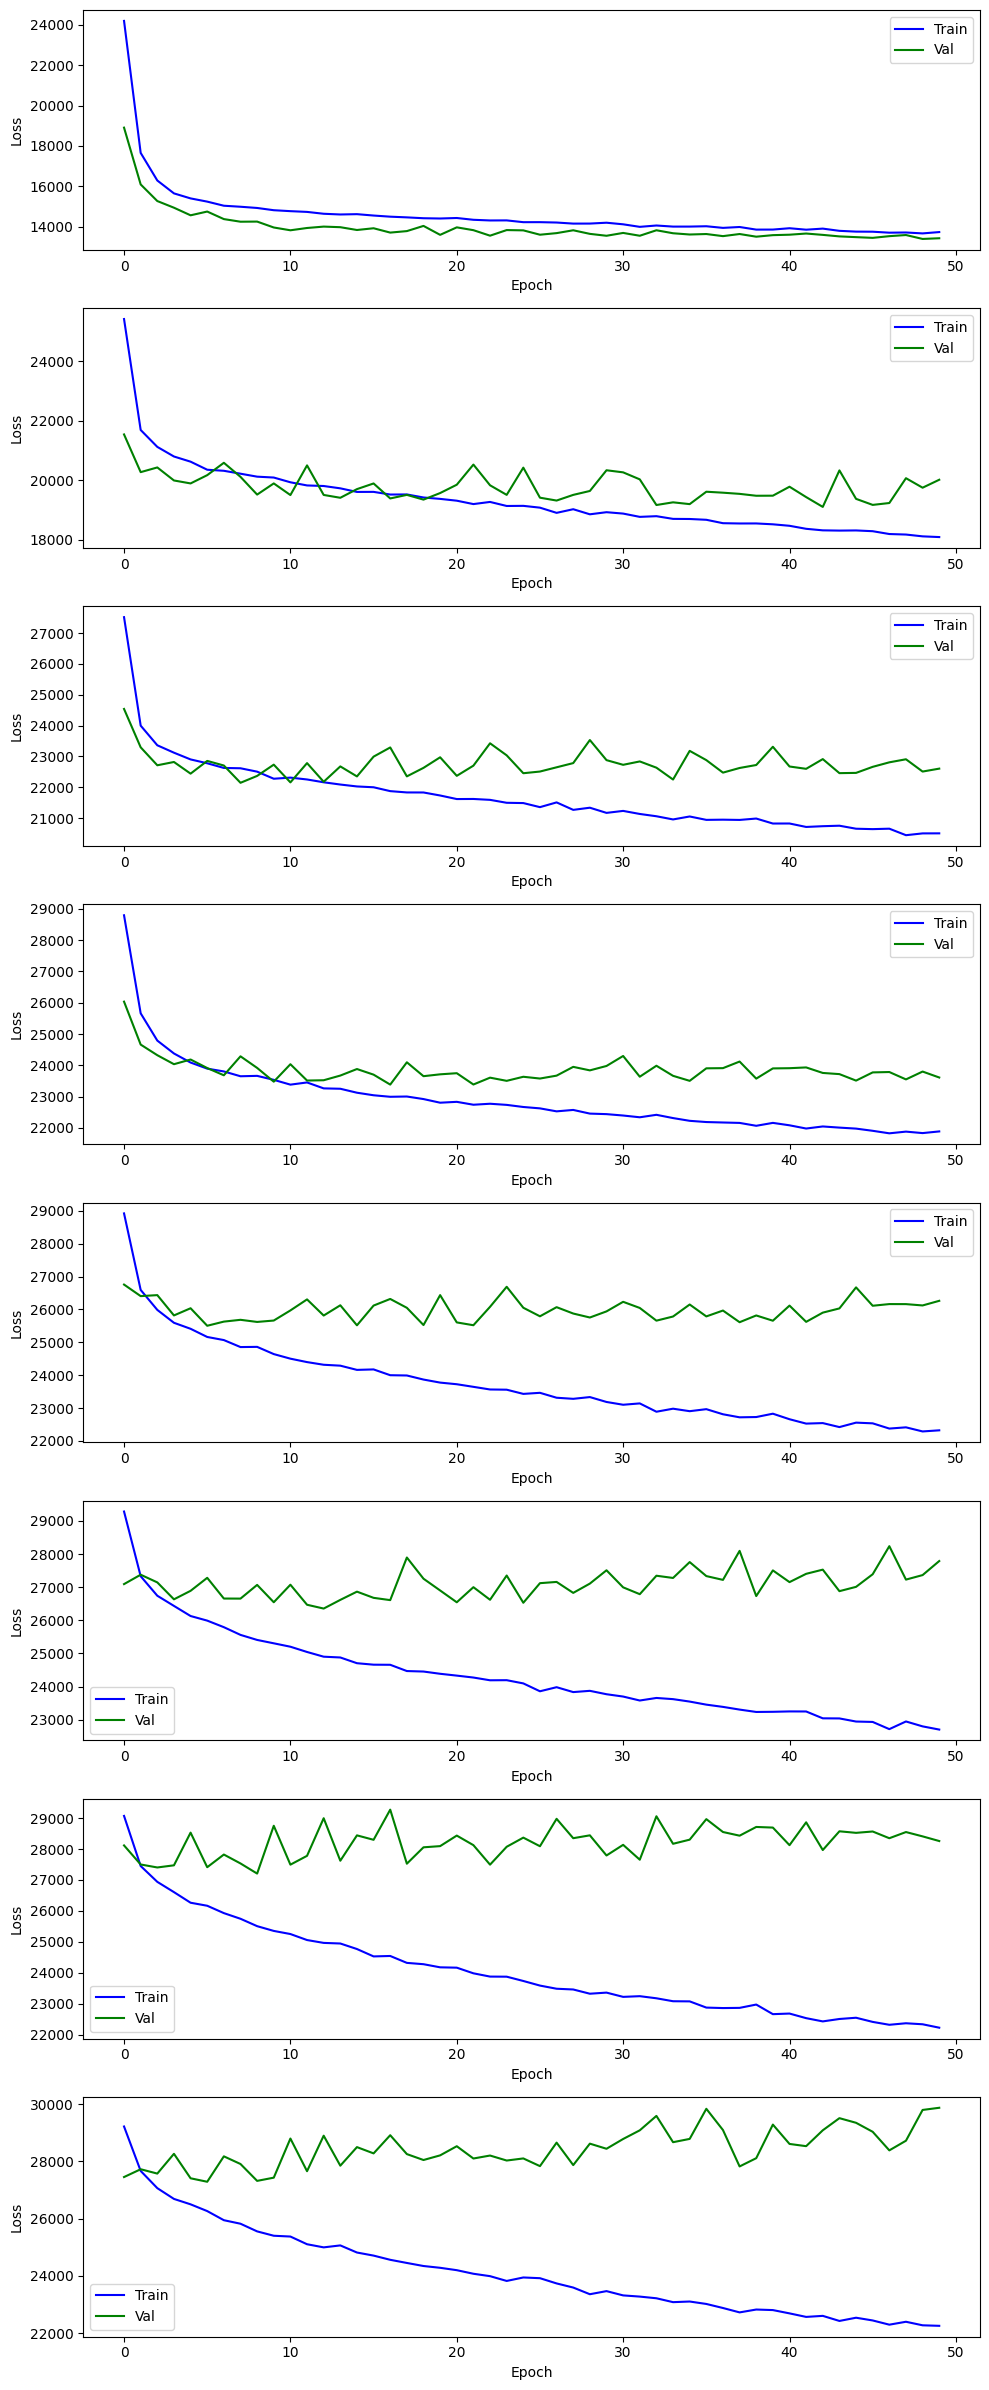

In [5]:
inference_helpers.arrange_figures_in_rows(n_rows=num_models, prefix="forward_")